In [64]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Import Missing value visualization
import missingno as msno
# Experimental feature for MissForrest
from sklearn.experimental import enable_iterative_imputer
# Import impute
from sklearn.impute import IterativeImputer
# Import MIssForrest
from sklearn.ensemble import RandomForestRegressor



# Data Imputation - Handle Missingness in data
- I. Display cleaned data and remove label features
- II. Convert NaN, None, null to pd.NA objects
- III. Visualization of missingness
- IV. Imputation with missForrest
- V. Visualization with completed data

In [55]:
pre_imputed_df = pd.read_csv('housing_data_cleaned.csv')
pre_imputed_df

,full_address_or_zip_code,zipcode,date_of_sale,sale_year,zone,cats_allowed,dogs_allowed,coop_condo,garage_exists,num_bedrooms,...,dining_room_type,fuel_type,kitchen_type,community_district_num,approx_year_built,sq_footage,walk_score,maintenance_cost,parking_charges,sale_price
0,"Flushing NY, 11355",11355,2016-02-16,2016.0,2.0,0,0,1,0,2,...,3.0,3.0,4.0,25.0,1955.0,NaN,82,NaN,0,228000.0
1,"30-11 Parsons Blvd, Flushing NY, 11354 ( Sold...",11354,2016-02-16,2016.0,2.0,0,0,1,0,1,...,5.0,1.0,4.0,25.0,1955.0,890.0,89,604.0,0,235500.0
2,"102-14 Lewis Ave, Corona NY, 11368",11368,2016-02-17,2016.0,9.0,0,0,2,0,1,...,3.0,NaN,2.0,24.0,2004.0,550.0,90,NaN,0,137550.0
3,"144-48 Roosevelt Ave, Flushing NY, 11354",11354,2016-02-17,2016.0,2.0,0,0,2,0,3,...,3.0,3.0,4.0,25.0,2002.0,NaN,94,NaN,0,545000.0
4,"245-27 76th Ave, Bellerose NY, 11426",11426,2016-02-18,2016.0,7.0,1,1,1,0,2,...,3.0,3.0,4.0,26.0,1949.0,675.0,71,660.0,0,241700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,"Not AvailableFlushing NY, 11355",11355,NaN,NaN,2.0,0,0,2,0,2,...,3.0,3.0,5.0,25.0,1987.0,NaN,97,NaN,0,NaN
2175,"One Bay Club Dr, Bayside NY, 11360",11360,NaN,NaN,2.0,1,0,2,1,2,...,5.0,3.0,4.0,25.0,1983.0,NaN,82,NaN,99,NaN
2176,"Ridgewood NY, 11385",11385,NaN,NaN,6.0,0,0,2,0,3,...,5.0,3.0,5.0,24.0,2010.0,1500.0,96,NaN,0,NaN
2177,"Ridgewood NY, 11385",11385,NaN,NaN,6.0,0,0,2,0,3,...,5.0,3.0,5.0,24.0,2010.0,1600.0,96,NaN,0,NaN


In [56]:
# Drop Label columns that don't need to be imputed
to_impute_df = pre_imputed_df.drop(["full_address_or_zip_code", "zipcode", "date_of_sale"], axis=1)
to_impute_df

,sale_year,zone,cats_allowed,dogs_allowed,coop_condo,garage_exists,num_bedrooms,num_floors_in_building,num_full_bathrooms,num_half_bathrooms,...,dining_room_type,fuel_type,kitchen_type,community_district_num,approx_year_built,sq_footage,walk_score,maintenance_cost,parking_charges,sale_price
0,2016.0,2.0,0,0,1,0,2,6.0,1,0,...,3.0,3.0,4.0,25.0,1955.0,NaN,82,NaN,0,228000.0
1,2016.0,2.0,0,0,1,0,1,7.0,1,0,...,5.0,1.0,4.0,25.0,1955.0,890.0,89,604.0,0,235500.0
2,2016.0,9.0,0,0,2,0,1,1.0,1,0,...,3.0,NaN,2.0,24.0,2004.0,550.0,90,NaN,0,137550.0
3,2016.0,2.0,0,0,2,0,3,NaN,2,0,...,3.0,3.0,4.0,25.0,2002.0,NaN,94,NaN,0,545000.0
4,2016.0,7.0,1,1,1,0,2,2.0,1,0,...,3.0,3.0,4.0,26.0,1949.0,675.0,71,660.0,0,241700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,NaN,2.0,0,0,2,0,2,7.0,1,0,...,3.0,3.0,5.0,25.0,1987.0,NaN,97,NaN,0,NaN
2175,NaN,2.0,1,0,2,1,2,NaN,2,0,...,5.0,3.0,4.0,25.0,1983.0,NaN,82,NaN,99,NaN
2176,NaN,6.0,0,0,2,0,3,NaN,2,0,...,5.0,3.0,5.0,24.0,2010.0,1500.0,96,NaN,0,NaN
2177,NaN,6.0,0,0,2,0,3,4.0,2,0,...,5.0,3.0,5.0,24.0,2010.0,1600.0,96,NaN,0,NaN


## II. Convert NaN, None, null to pd.NA objects
- Improve efficiency of missForrest 

In [57]:
to_impute_df = to_impute_df.applymap(lambda x: pd.NA if pd.isna(x) else x)
to_impute_df = to_impute_df.replace({None: pd.NA, 
                                     np.nan: pd.NA,
                                     'NaN': pd.NA})

# Assuming to_impute_df is your DataFrame
to_impute_df = to_impute_df.applymap(lambda x: pd.NA if pd.isna(x) else x)
to_impute_df = to_impute_df.replace({None: pd.NA, np.nan: pd.NA, 'NaN': pd.NA})

## III. Visualization of missingness with missingno

In [58]:
to_impute_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sale_year               522 non-null    object 
 1   zone                    2179 non-null   float64
 2   cats_allowed            2179 non-null   int64  
 3   dogs_allowed            2179 non-null   int64  
 4   coop_condo              2179 non-null   int64  
 5   garage_exists           2179 non-null   int64  
 6   num_bedrooms            2179 non-null   int64  
 7   num_floors_in_building  1531 non-null   object 
 8   num_full_bathrooms      2179 non-null   int64  
 9   num_half_bathrooms      2179 non-null   int64  
 10  num_total_rooms         2179 non-null   int64  
 11  dining_room_type        1749 non-null   object 
 12  fuel_type               2069 non-null   object 
 13  kitchen_type            2163 non-null   object 
 14  community_district_num  2160 non-null   

In [59]:
to_impute_df.isna().sum()

sale_year                 1657
zone                         0
cats_allowed                 0
dogs_allowed                 0
coop_condo                   0
garage_exists                0
num_bedrooms                 0
num_floors_in_building     648
num_full_bathrooms           0
num_half_bathrooms           0
num_total_rooms              0
dining_room_type           430
fuel_type                  110
kitchen_type                16
community_district_num      19
approx_year_built           40
sq_footage                1206
walk_score                   0
maintenance_cost           622
parking_charges              0
sale_price                1657
dtype: int64

<Axes: >

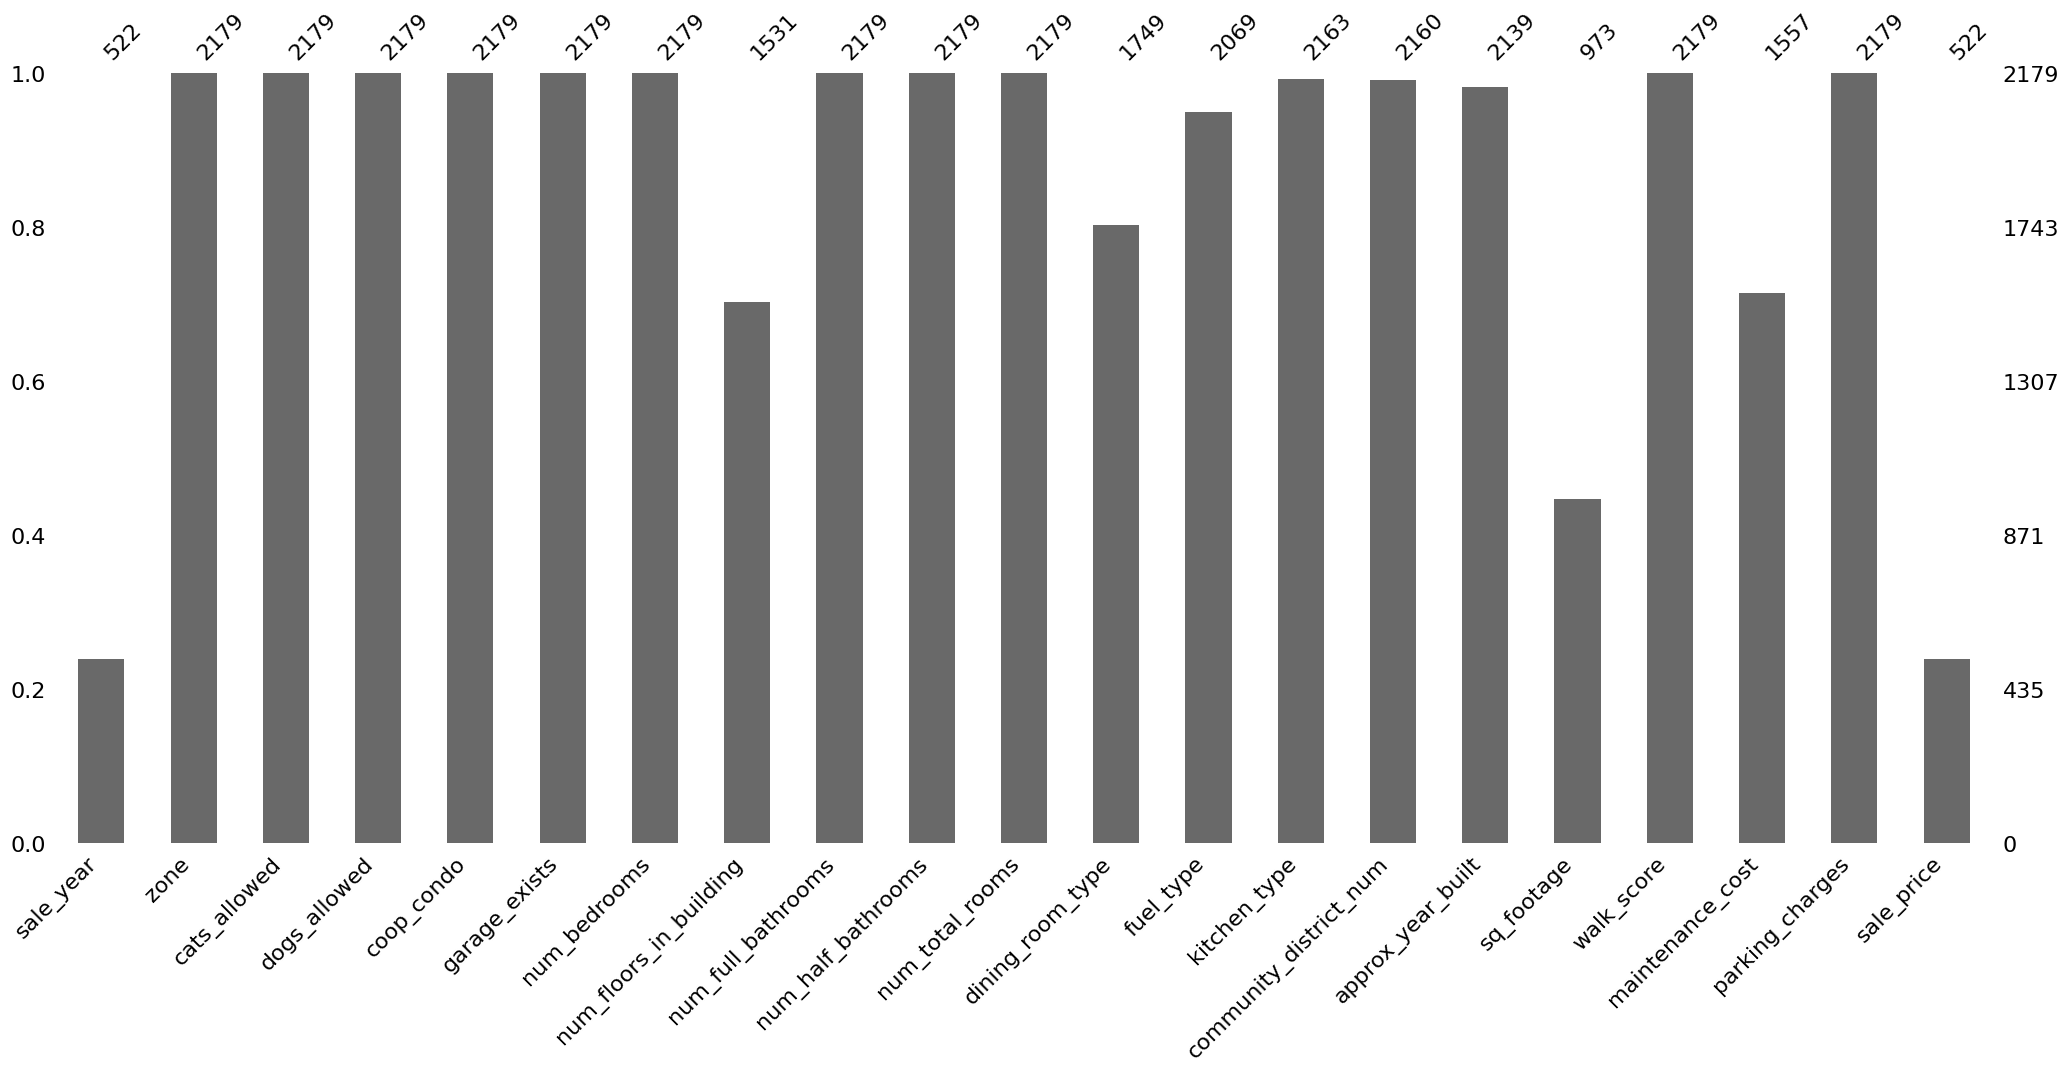

In [60]:
msno.bar(to_impute_df)

<Axes: >

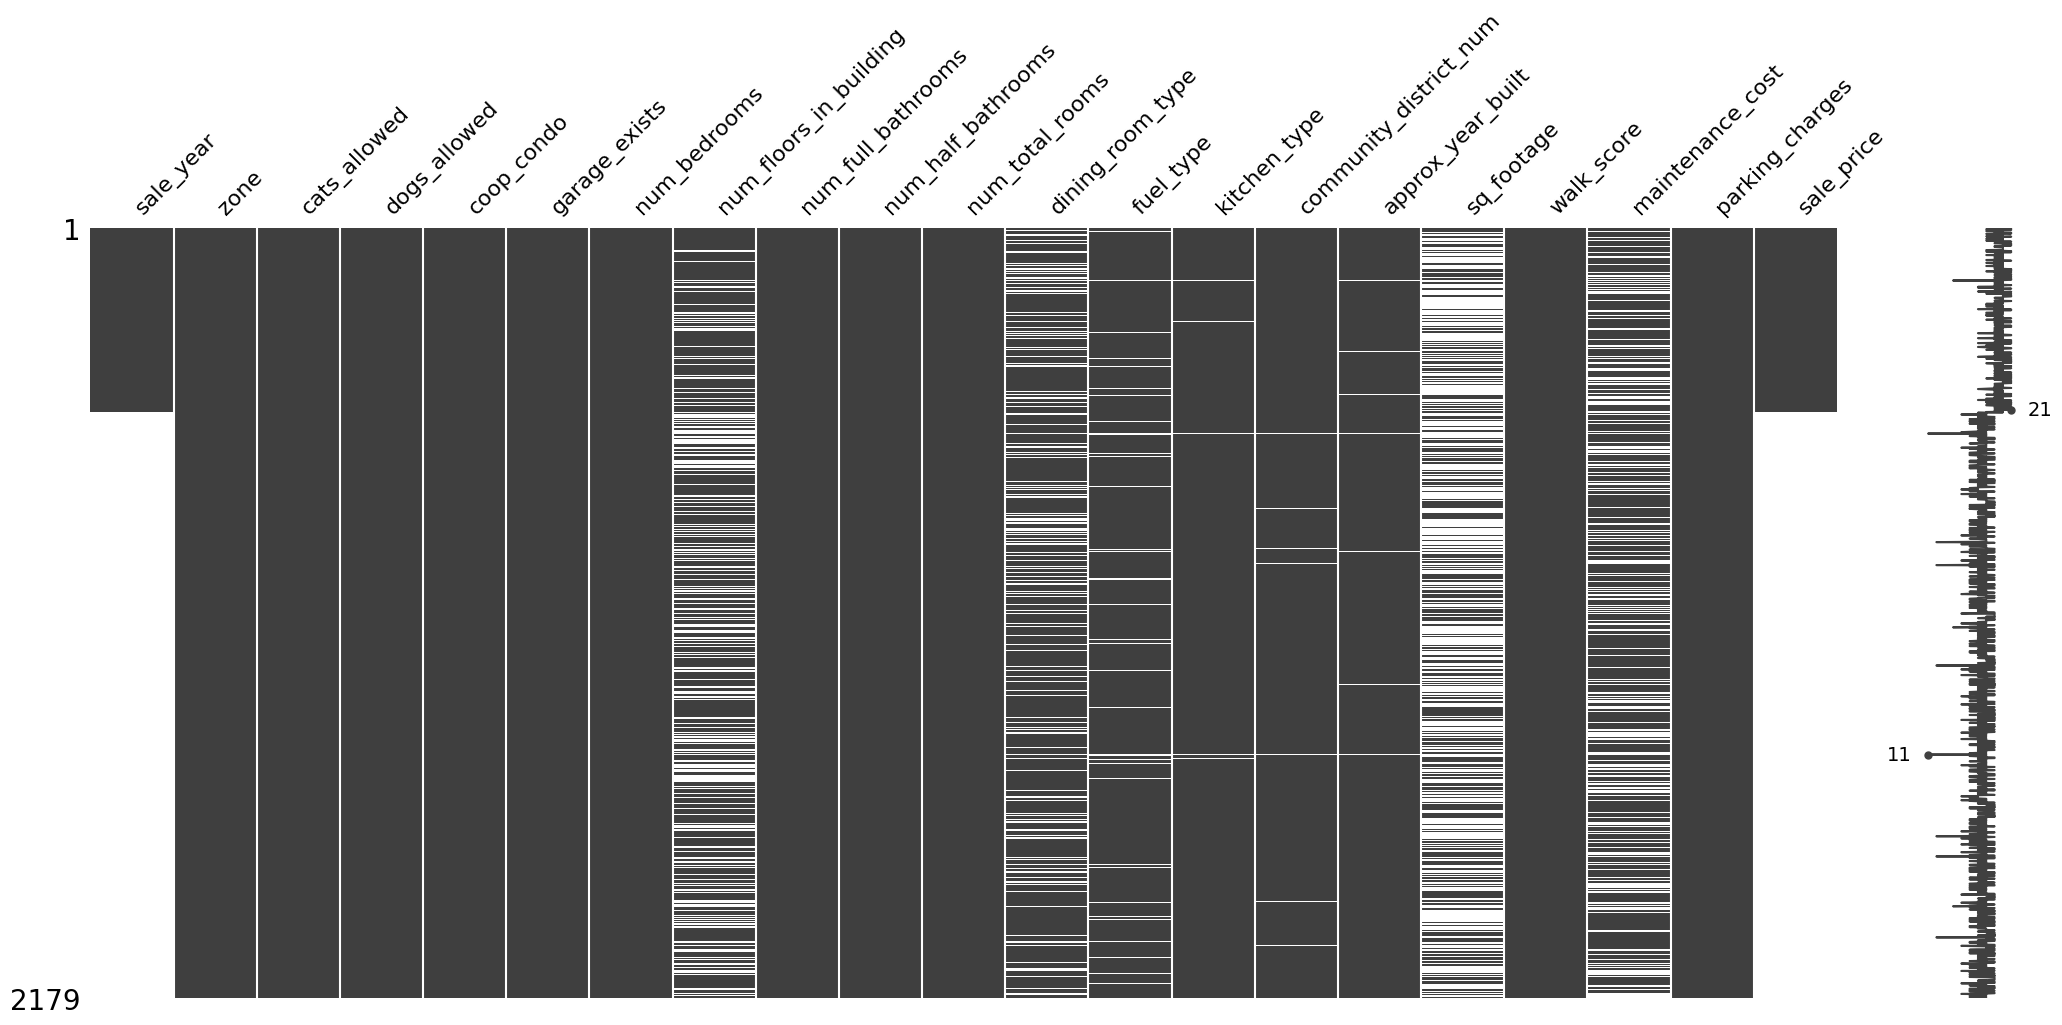

In [61]:
msno.matrix(to_impute_df)

## IV. Imputation with missForrest

In [63]:
# Train test split
X = to_impute_df.drop(columns=['sale_price'])
y = to_impute_df['sale_price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
# Assuming X_train, y_train, X_test, and y_test are pandas DataFrames or Series

# Convert y_train and y_test to DataFrames if they are Series
if isinstance(y_train, pd.Series):
    y_train = y_train.to_frame()
if isinstance(y_test, pd.Series):
    y_test = y_test.to_frame()

# Concatenate X and y for train and test sets
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Ensure all data is numerical
train_data = train_data.apply(pd.to_numeric, errors='coerce')
test_data = test_data.apply(pd.to_numeric, errors='coerce')

# Initialize the imputer
imp_mean = IterativeImputer(estimator=RandomForestRegressor(n_estimators=50), random_state=0)

# Fit the imputer on the training data
imp_mean.fit(train_data)

# Transform both the training and testing data
train_data_imputed = imp_mean.transform(train_data)
test_data_imputed = imp_mean.transform(test_data)

# Convert the imputed numpy arrays back to DataFrames
train_data_imputed = pd.DataFrame(train_data_imputed, columns=train_data.columns)
test_data_imputed = pd.DataFrame(test_data_imputed, columns=test_data.columns)

# Concatenate the rows of train_data_imputed and test_data_imputed
df = pd.concat([train_data_imputed, test_data_imputed], axis=0)

# Optionally, reset the index
df = df.reset_index(drop=True)

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


##   V. Visualization of Imputed Data

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sale_year               2179 non-null   float64
 1   zone                    2179 non-null   float64
 2   cats_allowed            2179 non-null   float64
 3   dogs_allowed            2179 non-null   float64
 4   coop_condo              2179 non-null   float64
 5   garage_exists           2179 non-null   float64
 6   num_bedrooms            2179 non-null   float64
 7   num_floors_in_building  2179 non-null   float64
 8   num_full_bathrooms      2179 non-null   float64
 9   num_half_bathrooms      2179 non-null   float64
 10  num_total_rooms         2179 non-null   float64
 11  dining_room_type        2179 non-null   float64
 12  fuel_type               2179 non-null   float64
 13  kitchen_type            2179 non-null   float64
 14  community_district_num  2179 non-null   

<Axes: >

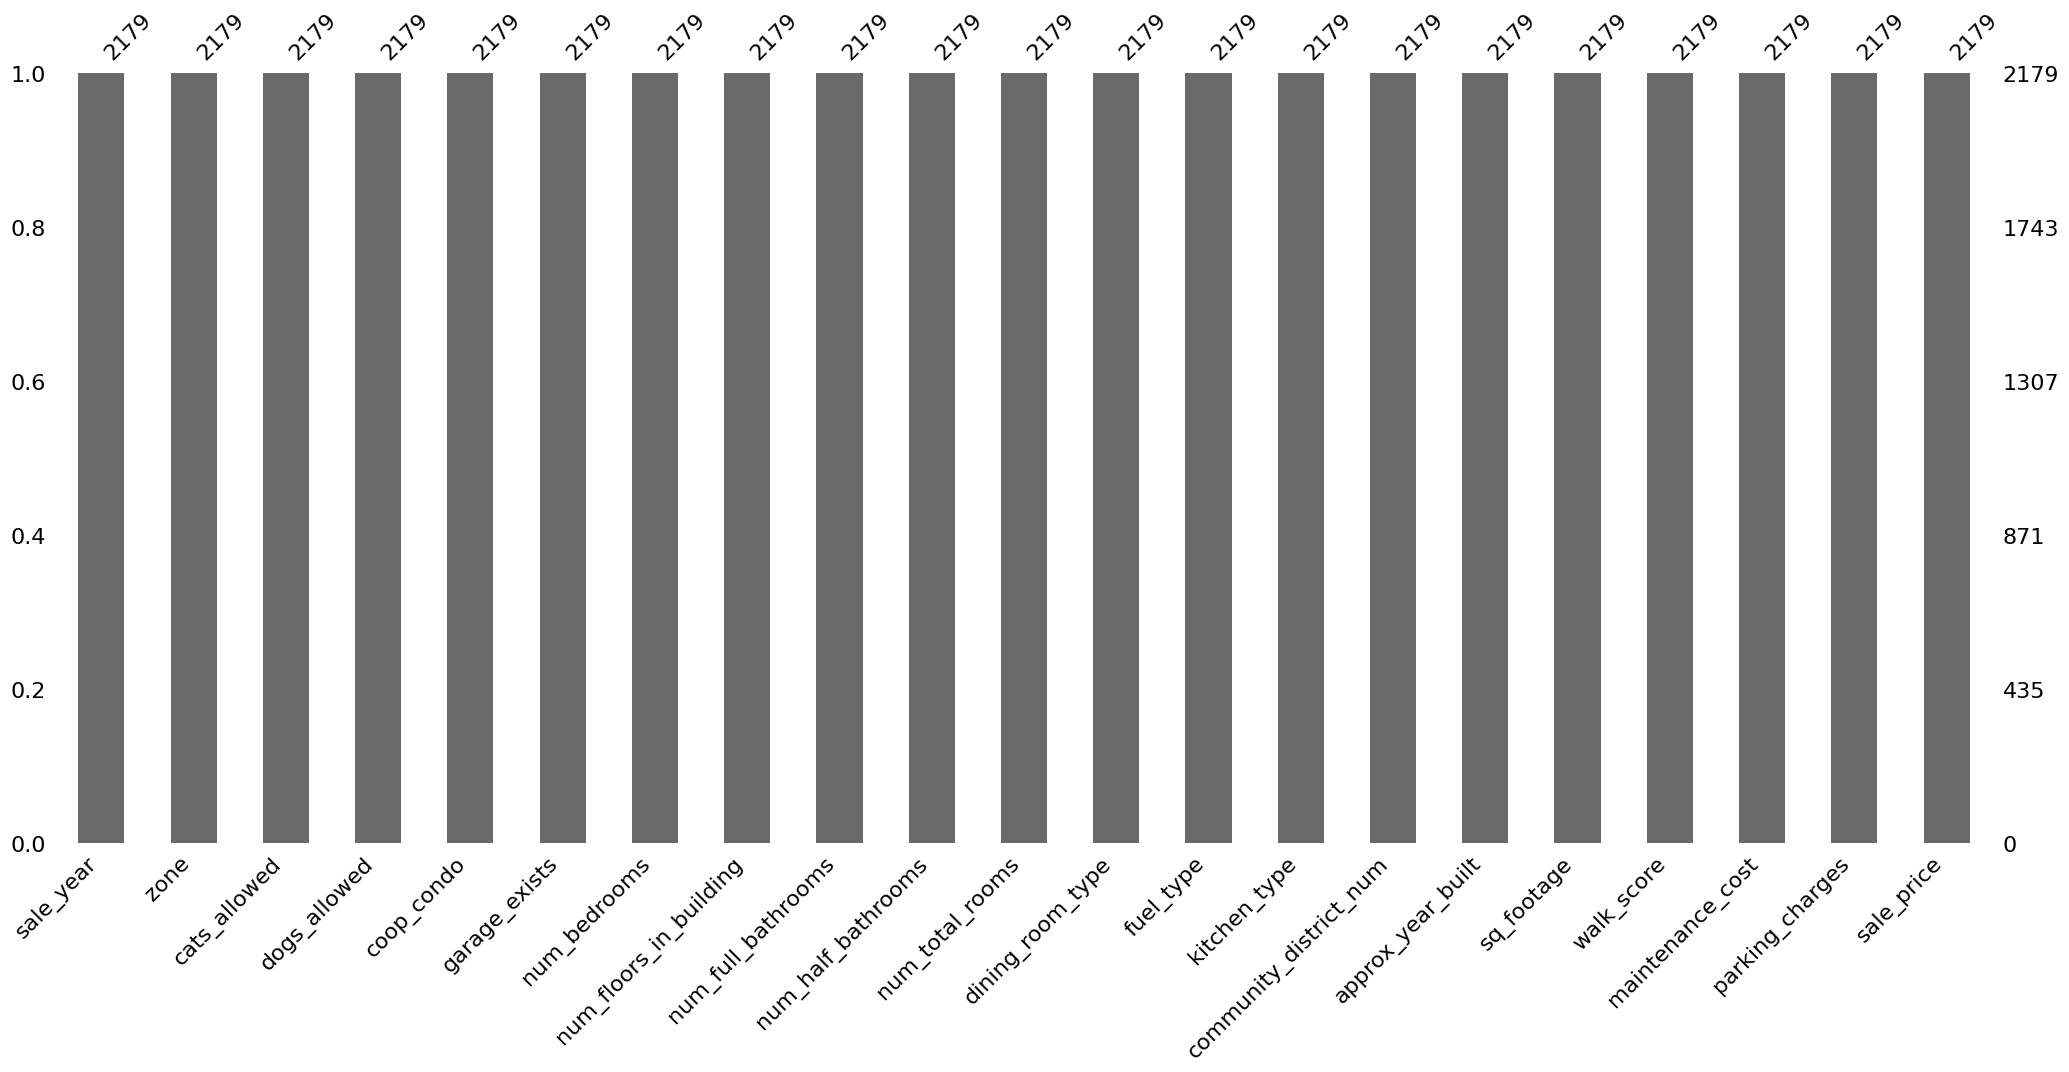

In [69]:
msno.bar(df)

<Axes: >

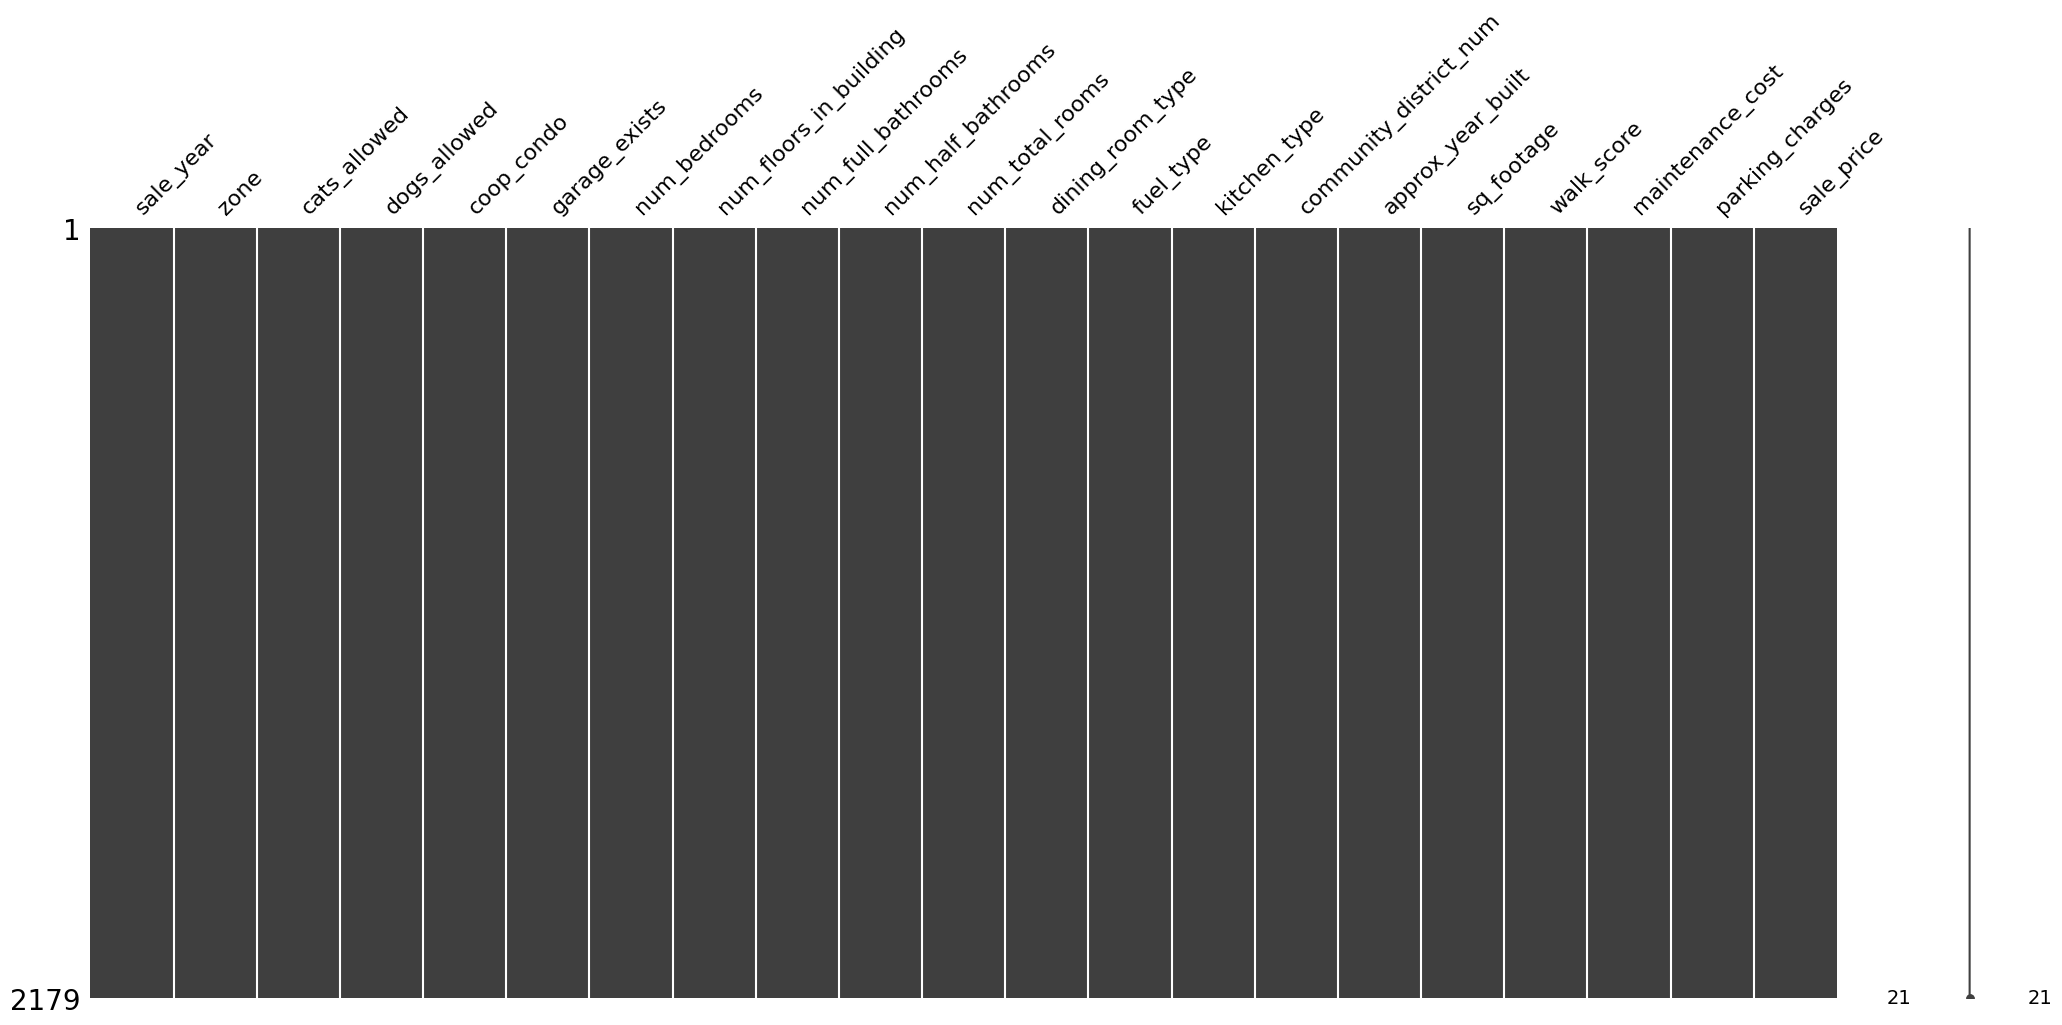

In [71]:
msno.matrix(df)

In [74]:
# Export Data
df.to_csv('housing_clean_imputed_data.csv', index=False)
